In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_bokeh
import re

In [59]:
pd.set_option("max_columns", 999)
pandas_bokeh.output_notebook()

Loading BokehJS ...

# Data import

In [60]:
df = pd.read_csv('../../Data/pokedex.csv').drop('Unnamed: 0', axis=1)

# Preprocessing (summary of 1st analysis)

In [61]:
df_qual = df.select_dtypes(include='object').drop(['german_name', 'japanese_name'], axis=1).drop(columns=['name'])
df_qual = df_qual.loc[~(df_qual['ability_1'].isna()) & ~(df_qual['egg_type_1'].isna())]

## Species

In [62]:
def extract_direct_species(x):
    if len(x) > 1:
        return x[-1]
    else:
        return x[0]

In [63]:
df_qual['species'] = df_qual['species'].transform(lambda x: re.sub(' Pokémon$', '', x))
df_qual['species'] = df_qual['species'].transform(lambda x: str.split(x, ' ')).transform(lambda x: extract_direct_species(x))                                                  

In [64]:
veryrare_species = df_qual['species'].value_counts()[df_qual['species'].value_counts() == 1].index
rare_species = df_qual['species'].value_counts()[df_qual['species'].value_counts() == 2].index

In [65]:
df_qual.loc[df_qual['species'].isin(veryrare_species), 'species'] = 'vrare'
df_qual.loc[df_qual['species'].isin(rare_species), 'species'] = 'rare'

## Type_2

In [66]:
df_qual['type_2'].fillna(value='None', inplace=True)

## Ability_1

In [67]:
def abilities_part(x):
    adj = []
    noun =[]
    for ability in x:
        if len(ability) > 1:
            adj.append(ability[0])
            noun.append(ability[1])
        else:
            adj.append('None')
            noun.append(ability[0])
    return adj, noun

In [68]:
adj_ab, noun_ab = abilities_part(df_qual['ability_1'].fillna('noData').transform(lambda x: x.str.split(' ')))

In [69]:
df_qual['ability_adjective'] = adj_ab
df_qual['ability_noun'] = noun_ab
df_qual.drop(columns=['ability_1'], inplace=True)

In [70]:
very_rare_adj = df_qual['ability_adjective'].value_counts()[df_qual['ability_adjective'].value_counts() == 1].index
rare_adj = df_qual['ability_adjective'].value_counts()[df_qual['ability_adjective'].value_counts() == 2].index

In [71]:
df_qual.loc[df_qual['ability_adjective'].isin(very_rare_adj), 'ability_adjective'] = 'vrare'
df_qual.loc[df_qual['ability_adjective'].isin(rare_adj), 'ability_adjective'] = 'rare'

In [72]:
very_rare_noun = df_qual['ability_noun'].value_counts()[df_qual['ability_noun'].value_counts() == 1].index
rare_noun = df_qual['ability_noun'].value_counts()[df_qual['ability_noun'].value_counts() == 2].index

In [73]:
df_qual.loc[df_qual['ability_noun'].isin(very_rare_noun), 'ability_noun'] = 'vrare'
df_qual.loc[df_qual['ability_noun'].isin(rare_noun), 'ability_noun'] = 'rare'

In [74]:
df_qual.head()

,status,species,type_1,type_2,ability_2,ability_hidden,growth_rate,egg_type_1,egg_type_2,ability_adjective,ability_noun
0,Normal,Seed,Grass,Poison,NaN,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
1,Normal,Seed,Grass,Poison,NaN,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
2,Normal,Seed,Grass,Poison,NaN,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
3,Normal,Seed,Grass,Poison,NaN,NaN,Medium Slow,Grass,Monster,Thick,Fat
4,Normal,Lizard,Fire,None,NaN,Solar Power,Medium Slow,Dragon,Monster,None,Blaze


## Ability_2

In [75]:
df_qual['ability_2'].fillna('None', inplace=True)

In [76]:
vrare_ability2 = df_qual['ability_2'].value_counts()[df_qual['ability_2'].value_counts() == 1].index
rare_ability2 = df_qual['ability_2'].value_counts()[df_qual['ability_2'].value_counts() == 2].index

In [77]:
df_qual.loc[df_qual['ability_2'].isin(vrare_ability2), 'ability_2'] = 'vrare'
df_qual.loc[df_qual['ability_2'].isin(rare_ability2), 'ability_2'] = 'rare'

## Ability_hidden

In [78]:
df_qual['ability_hidden'].fillna('None', inplace=True)

In [79]:
vrare_ability_hidden = df_qual['ability_hidden'].value_counts()[df_qual['ability_hidden'].value_counts() == 1].index
rare_ability_hidden = df_qual['ability_hidden'].value_counts()[df_qual['ability_hidden'].value_counts() == 2].index

In [80]:
df_qual.loc[df_qual['ability_hidden'].isin(vrare_ability_hidden), 'ability_hidden'] = 'vrare'
df_qual.loc[df_qual['ability_hidden'].isin(rare_ability_hidden), 'ability_hidden'] = 'rare'

In [81]:
df_qual.head()

,status,species,type_1,type_2,ability_2,ability_hidden,growth_rate,egg_type_1,egg_type_2,ability_adjective,ability_noun
0,Normal,Seed,Grass,Poison,None,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
1,Normal,Seed,Grass,Poison,None,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
2,Normal,Seed,Grass,Poison,None,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
3,Normal,Seed,Grass,Poison,None,None,Medium Slow,Grass,Monster,Thick,Fat
4,Normal,Lizard,Fire,None,None,Solar Power,Medium Slow,Dragon,Monster,None,Blaze


## Egg_type_1

In [83]:
df_qual['egg_type_1']=df_qual['egg_type_1'].transform(lambda x: re.sub('\s\d+$', '', x))
df_qual.loc[df_qual['egg_type_1'] == 'Ditto', 'egg_type_1'] = 'Undiscovered'

## Egg_type_2

In [84]:
df_qual['egg_type_2'].fillna('None', inplace=True)

In [85]:
df_qual['egg_type_2']=df_qual['egg_type_2'].transform(lambda x: re.sub('\s\d+$', '', x))

# DF after preprocessing

In [87]:
df_qual.head()

,status,species,type_1,type_2,ability_2,ability_hidden,growth_rate,egg_type_1,egg_type_2,ability_adjective,ability_noun
0,Normal,Seed,Grass,Poison,None,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
1,Normal,Seed,Grass,Poison,None,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
2,Normal,Seed,Grass,Poison,None,Chlorophyll,Medium Slow,Grass,Monster,None,Overgrow
3,Normal,Seed,Grass,Poison,None,None,Medium Slow,Grass,Monster,Thick,Fat
4,Normal,Lizard,Fire,None,None,Solar Power,Medium Slow,Dragon,Monster,None,Blaze


# Analysis

## Status vs

### Species

In [119]:
df_qual.groupby('status')['species'].value_counts()

status         species 
Legendary      vrare       13
               rare         6
               Prism        4
               Warrior      4
               Boundary     3
                           ..
Sub Legendary  Electric     1
               Emotion      1
               Flame        1
               Sword        1
               Volcano      1
Name: species, Length: 120, dtype: int64

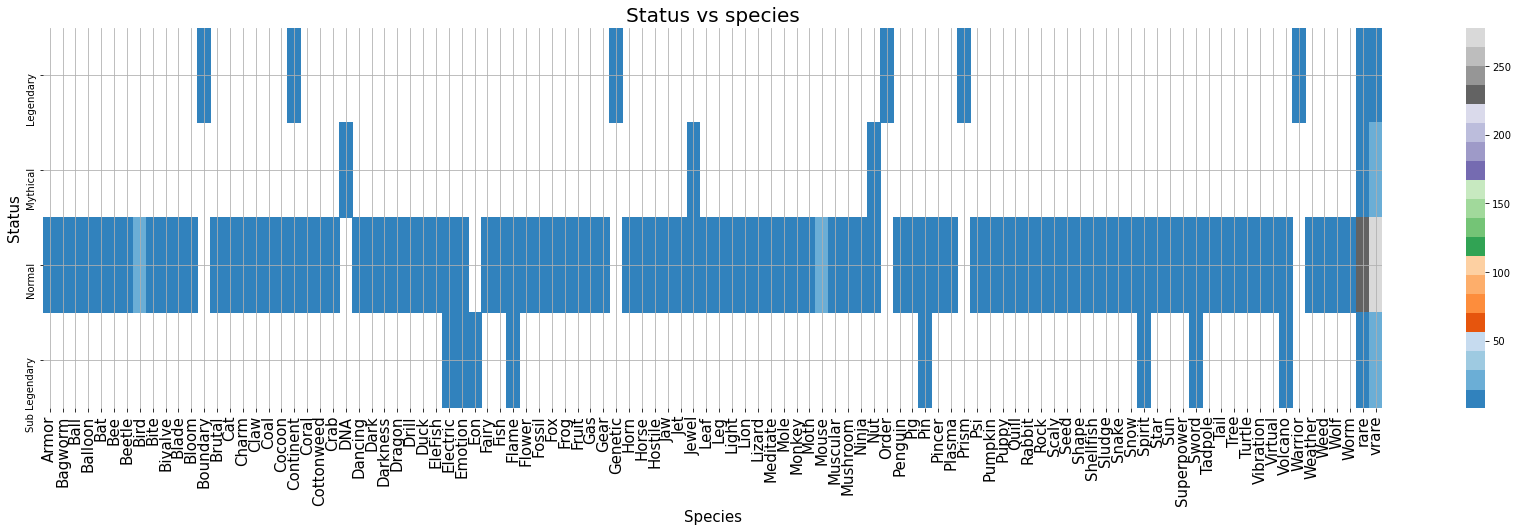

In [189]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='species', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('Species', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs species', fontsize=20)
plt.show()


### vs Type_1

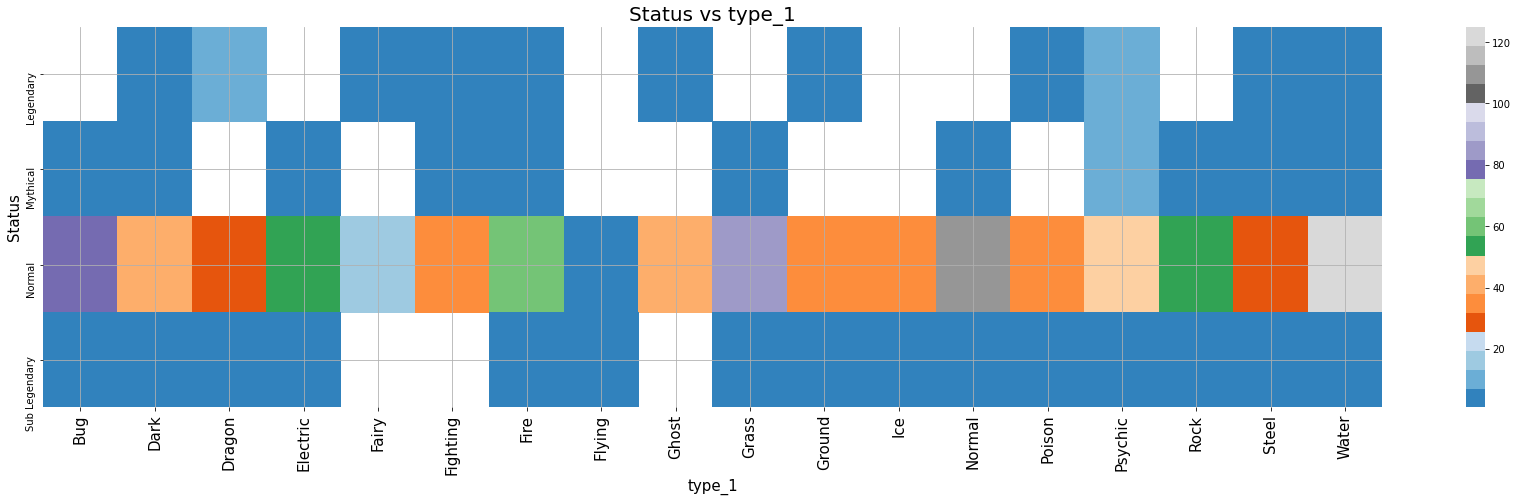

In [191]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='type_1', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('type_1', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs type_1', fontsize=20)
plt.show()


### vs Type_2

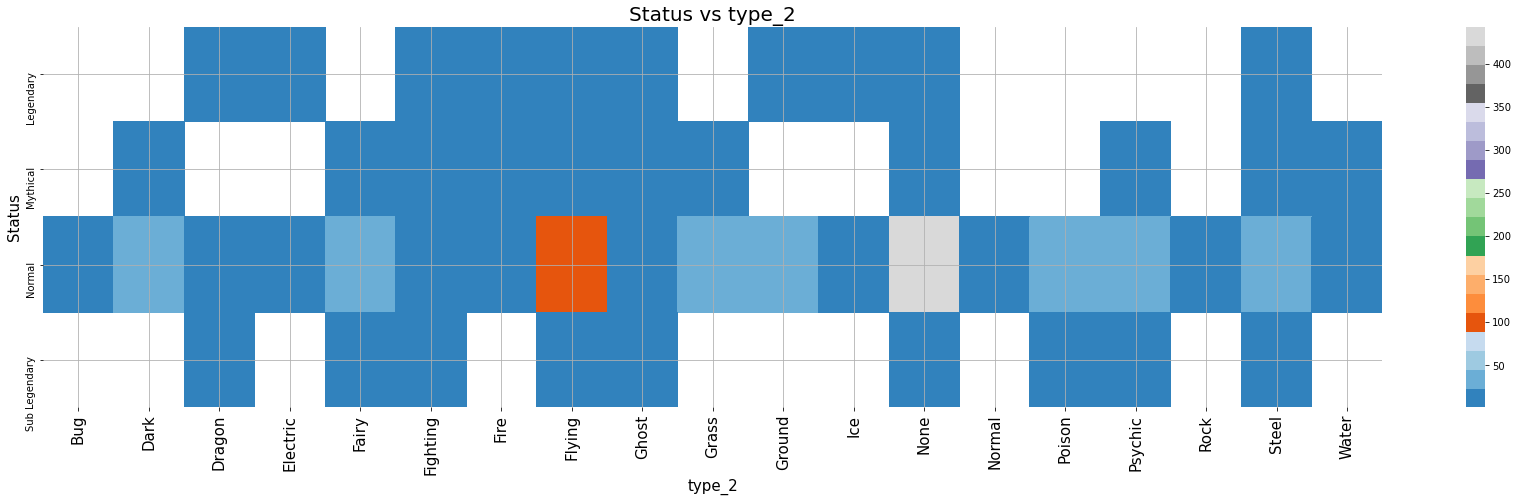

In [192]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='type_2', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('type_2', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs type_2', fontsize=20)
plt.show()


### vs Ability_1_adjective

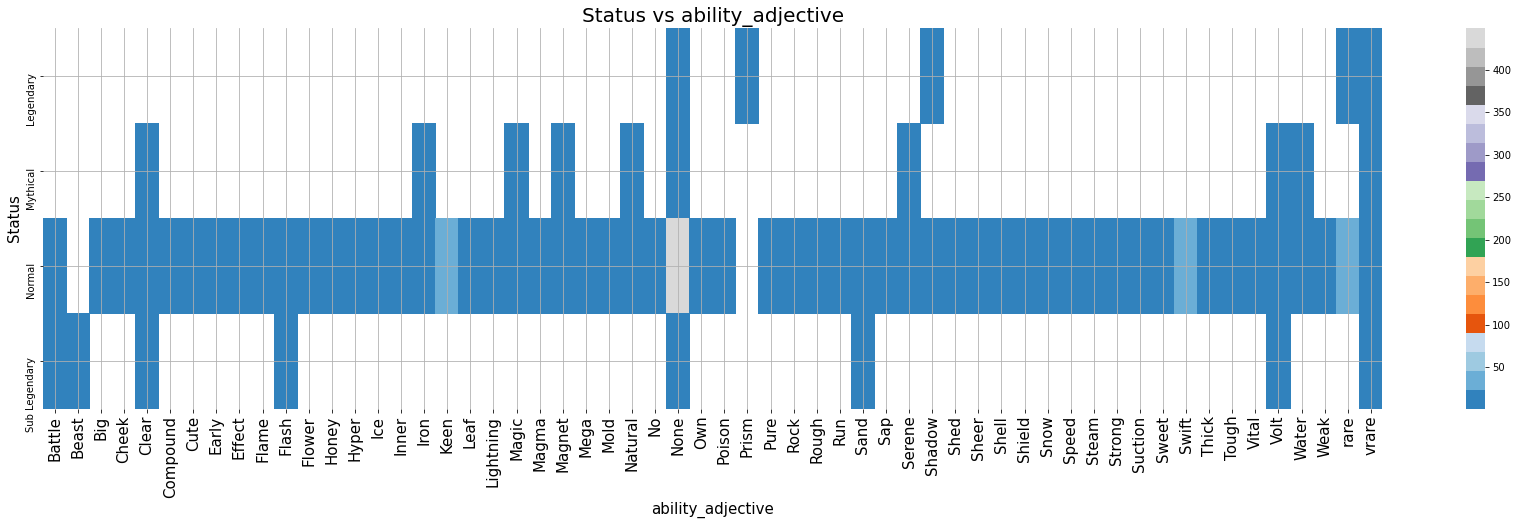

In [193]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='ability_adjective', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('ability_adjective', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs ability_adjective', fontsize=20)
plt.show()


### vs Ability_1_noun

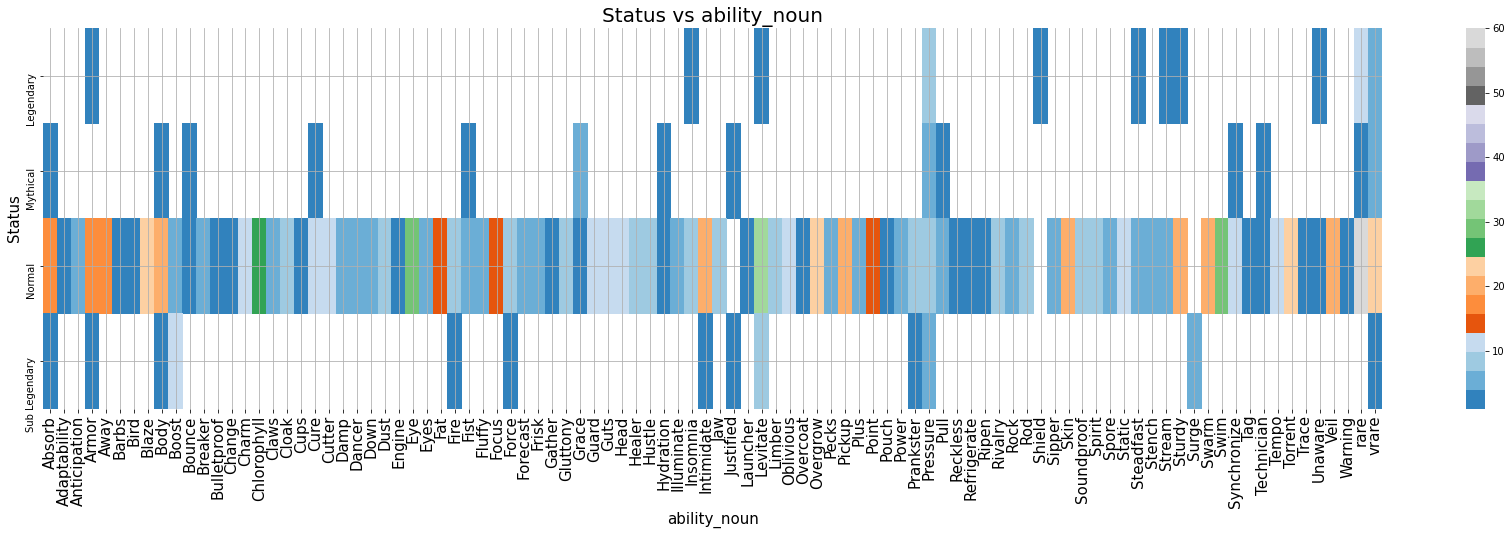

In [194]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='ability_noun', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('ability_noun', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs ability_noun', fontsize=20)
plt.show()


### vs Ability_2

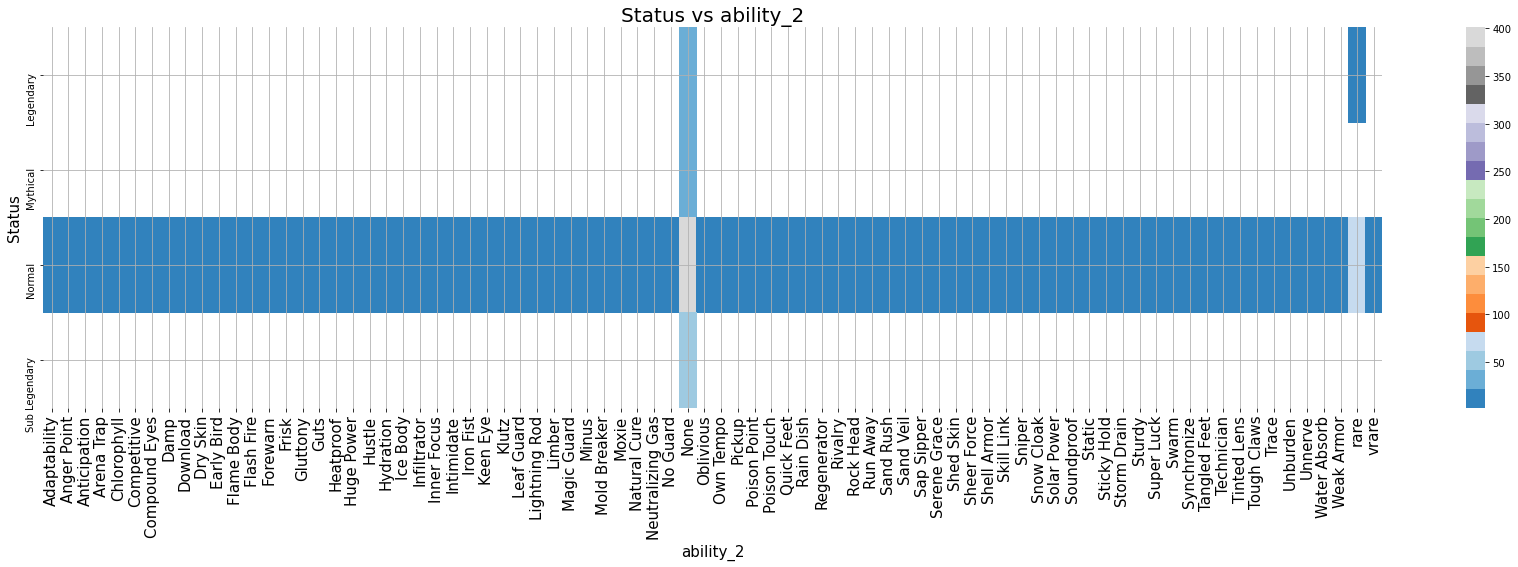

In [195]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='ability_2', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('ability_2', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs ability_2', fontsize=20)
plt.show()


### vs Ability_hidden

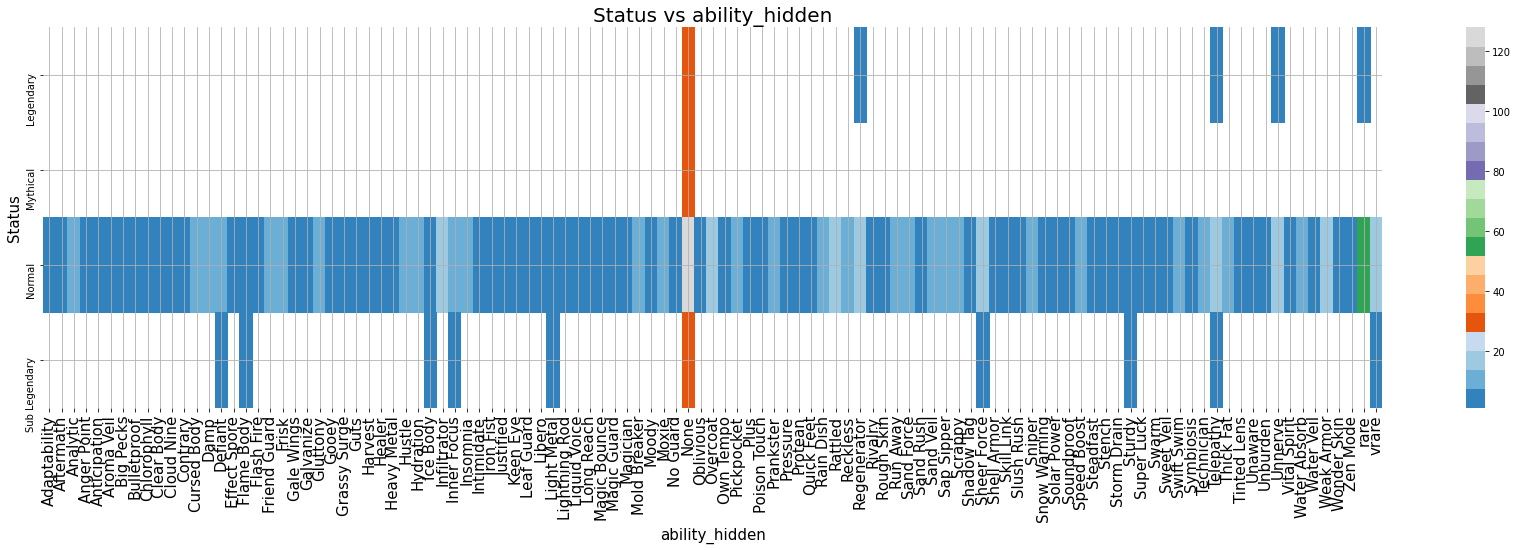

In [196]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='ability_hidden', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('ability_hidden', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs ability_hidden', fontsize=20)
plt.show()

### vs Growth_rate

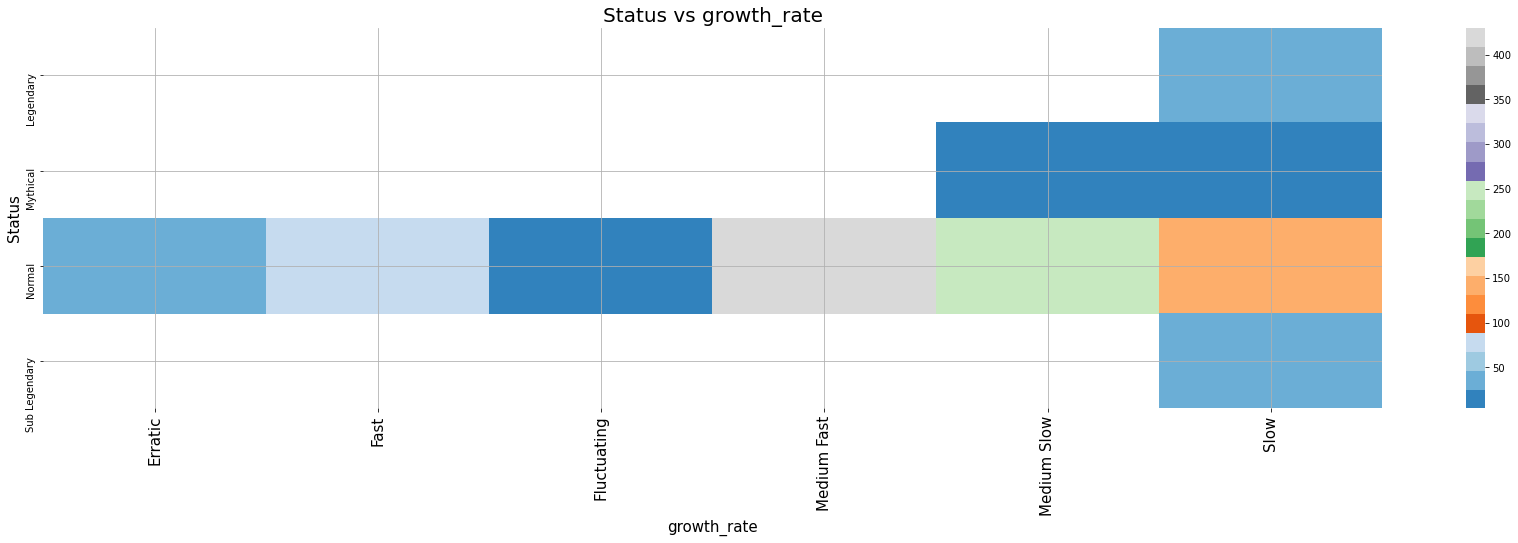

In [197]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='growth_rate', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('growth_rate', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs growth_rate', fontsize=20)
plt.show()

### vs Egg_type_1

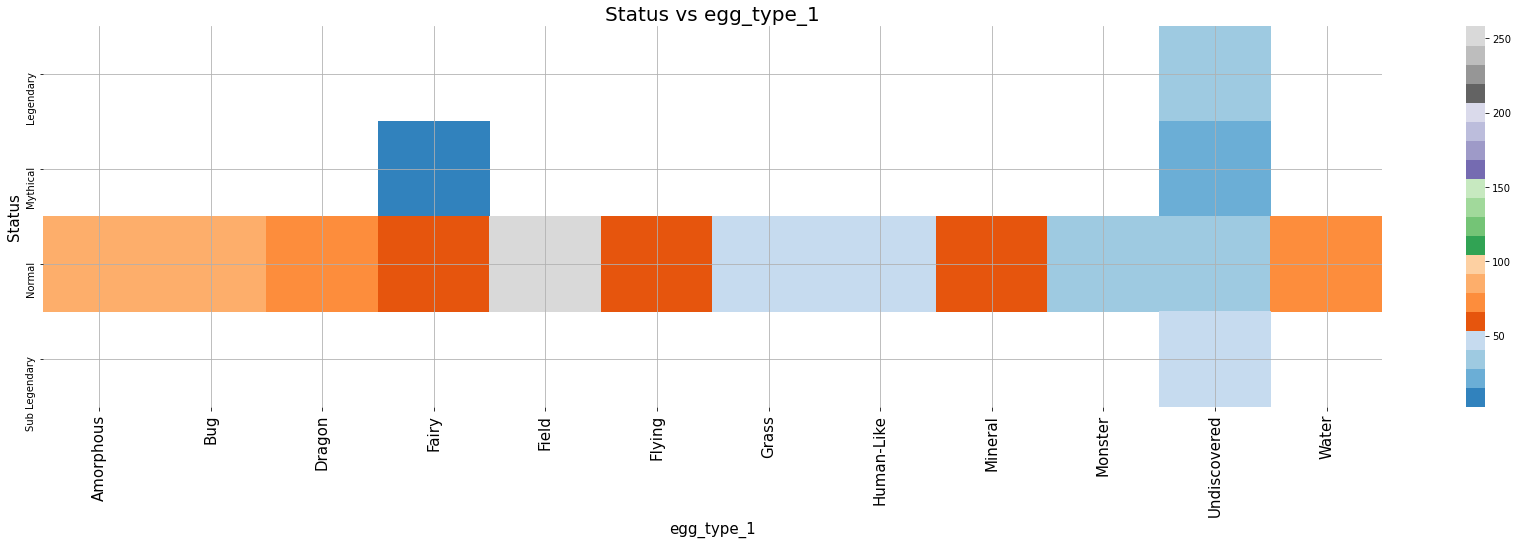

In [198]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='egg_type_1', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('egg_type_1', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs egg_type_1', fontsize=20)
plt.show()

### vs Egg_type_2

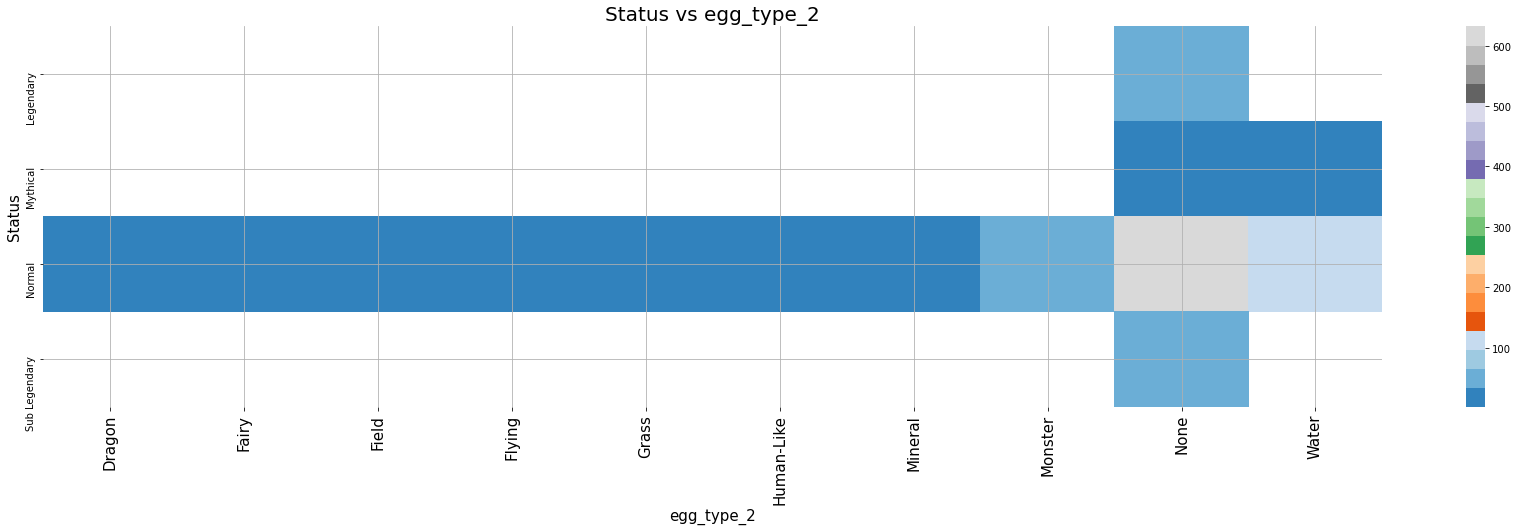

In [199]:
plt.figure(figsize=(30, 7))
sns.heatmap(df_qual.pivot_table(index='status', columns='egg_type_2', aggfunc='size'), xticklabels=True, cmap='tab20c')
plt.grid()
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('egg_type_2', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.title('Status vs egg_type_2', fontsize=20)
plt.show()

In [176]:
df_qual.columns

Index(['status', 'species', 'type_1', 'type_2', 'ability_2', 'ability_hidden',
       'growth_rate', 'egg_type_1', 'egg_type_2', 'ability_adjective',
       'ability_noun'],
      dtype='object')